In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salaries.csv")

C:\Users\Hp\AppData\Local\Temp\ipykernel_16364\91212481.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Salaries.csv")


In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


---
# Data Cleaning and Analysis Summary
---

## Data Type Conversion
The following columns were converted to numeric data types:
- `BasePay`
- `OvertimePay`
- `OtherPay`
- `Benefits`

Any non-numeric values were coerced into NaN (missing values).

In [5]:
df[["BasePay", "OvertimePay", "OtherPay", "Benefits"]] = df[["BasePay", "OvertimePay", "OtherPay", "Benefits"]].apply(pd.to_numeric, errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


## Summary Statistics Before Data Cleaning
```
- BasePay: Mean = 66,325.45, Min = -166.01, Max = 319,275.01
- OvertimePay: Mean = 5,066.06, Min = -0.01, Max = 245,131.88
- OtherPay: Mean = 3,648.77, Min = -7,058.59, Max = 400,184.25
- Benefits: Mean = 25,007.89, Min = -33.89, Max = 96,570.66
- TotalPay: Mean = 74,768.32, Min = -618.13, Max = 567,595.43
- TotalPayBenefits: Mean = 93,692.55, Min = -618.13, Max = 567,595.43
```
Some negative values indicate potential data errors or deductions in pay.

In [7]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


## Missing Values Before Handling
```
- BasePay: 609 missing values
- OvertimePay: 4 missing values
- OtherPay: 4 missing values
- Benefits: 36,163 missing values
- Notes: 148,654 missing values (entirely missing)
- Status: 110,535 missing values
```
Columns `Notes` and `Status` had excessive missing values and were dropped.

In [8]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

## Data Cleaning Actions
- **BasePay**: Missing values filled with the mean (66,325.45).
- **OvertimePay & OtherPay & Benefits**: Missing values filled with 0.
- **Dropped Columns**: `Status` and `Notes`.

After this cleaning, there were no missing values left in the dataset.

In [9]:
df["BasePay"] = df["BasePay"].fillna(df["BasePay"].mean())

In [10]:
df[["OvertimePay","OtherPay","Benefits"]] = df[["OvertimePay","OtherPay","Benefits"]].fillna(0)

In [11]:
df.drop(columns=["Status"],inplace=True)

In [12]:
df.drop(columns=["Notes"],inplace=True)

---

## Ensuring Correct Calculation of TotalPay and TotalPayBenefits

To ensure that total compensation is correctly computed, we calculate two important columns.

In [13]:
df["TotalPay"] = df["BasePay"]+df["OvertimePay"]+df["OtherPay"]

In [14]:
df["TotalPayBenefits"] = df["TotalPay"]+df["Benefits"]

## Summary Statistics After Data Cleaning
```
- BasePay: Mean = 66,325.45, Min = -166.01, Max = 319,275.01
- OvertimePay: Mean = 5,065.92, Min = -0.01, Max = 245,131.88
- OtherPay: Mean = 3,648.67, Min = -7,058.59, Max = 400,184.25
- Benefits: Mean = 18,924.23, Min = -33.89, Max = 96,570.66
- TotalPay: Mean = 75,040.04, Min = -618.13, Max = 567,595.43
- TotalPayBenefits: Mean = 93,964.27, Min = -618.13, Max = 567,595.43

In [15]:
df[["BasePay","OvertimePay","OtherPay","Benefits","TotalPay","TotalPayBenefits"]].describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,66325.448840,5065.923568,3648.669115,18924.232839,75040.041524,93964.274363
std,42676.946745,11454.256594,8056.515703,17165.279495,50315.671759,62572.481299
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000
25%,33847.017500,0.000000,0.000000,0.000000,37291.415000,45386.247500
50%,65092.190000,0.000000,811.170000,23214.020000,71490.350000,92419.380000
75%,94605.740000,4657.632500,4235.907500,33468.980000,105851.745000,132889.412500
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


---
## Distribution analysis
---

## Histogram of BasePay, OvertimePay, TotalPay

### BasePay Distribution
- The histogram shows a right-skewed distribution, meaning most employees have lower base pay, with fewer employees earning significantly higher salaries.
- The peak frequency is in the lower salary range, gradually decreasing as salaries increase.
- There are some negative values that may need further investigation.

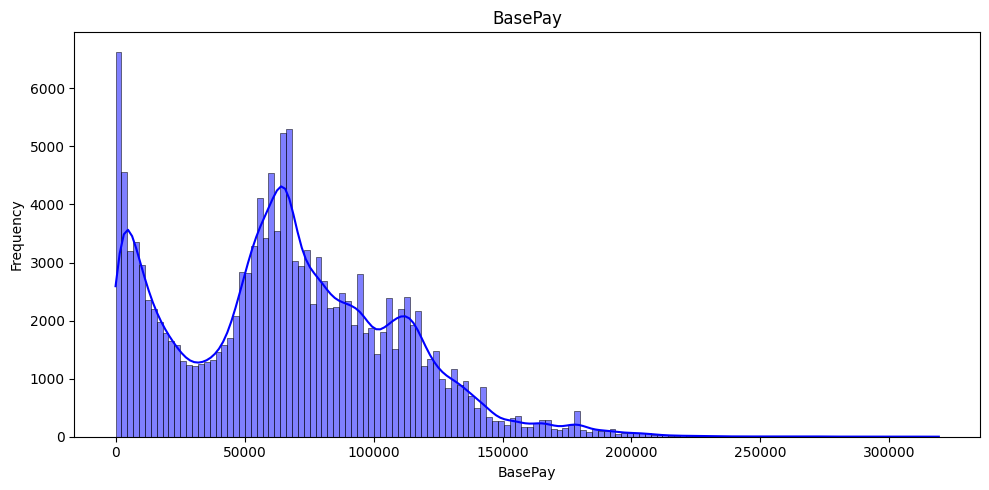

In [16]:
# Histogram for BasePay
plt.figure(figsize=(10,5))
sns.histplot(df['BasePay'],color='blue' , kde=True)
plt.title('BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.tight_layout()

### OvertimePay Distribution
- The majority of employees have little to no overtime pay, as indicated by the high concentration of values near zero.
- A long right tail shows that some employees receive substantial overtime pay.

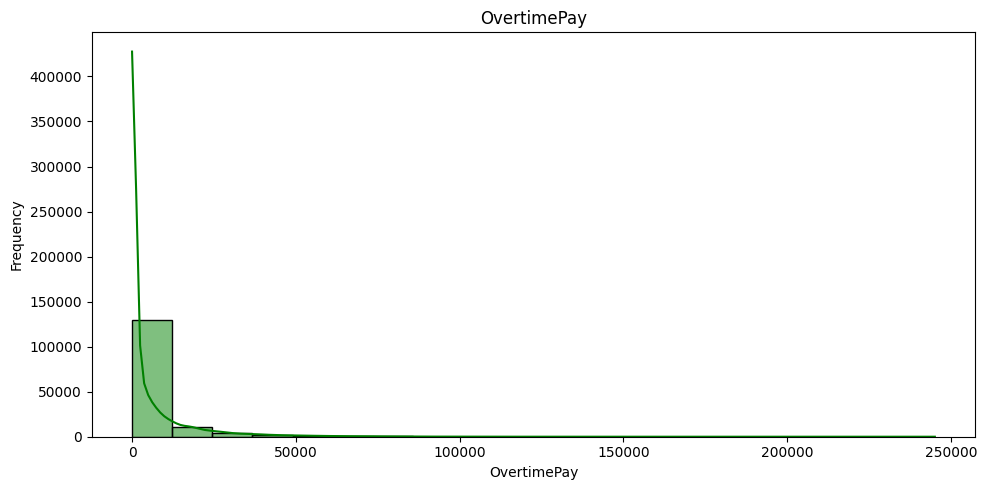

In [17]:
# Histogram for OvertimePay
plt.figure(figsize=(10,5))
sns.histplot(df['OvertimePay'], bins=20, kde=True, color='green')
plt.title('OvertimePay')
plt.xlabel('OvertimePay')
plt.ylabel('Frequency')
plt.tight_layout()

### TotalPay Distribution
- The distribution follows a similar pattern to BasePay but accounts for OvertimePay and OtherPay.
- Most employees fall within a common pay range, but a few have significantly higher total earnings, contributing to the right-skewed nature of the data.

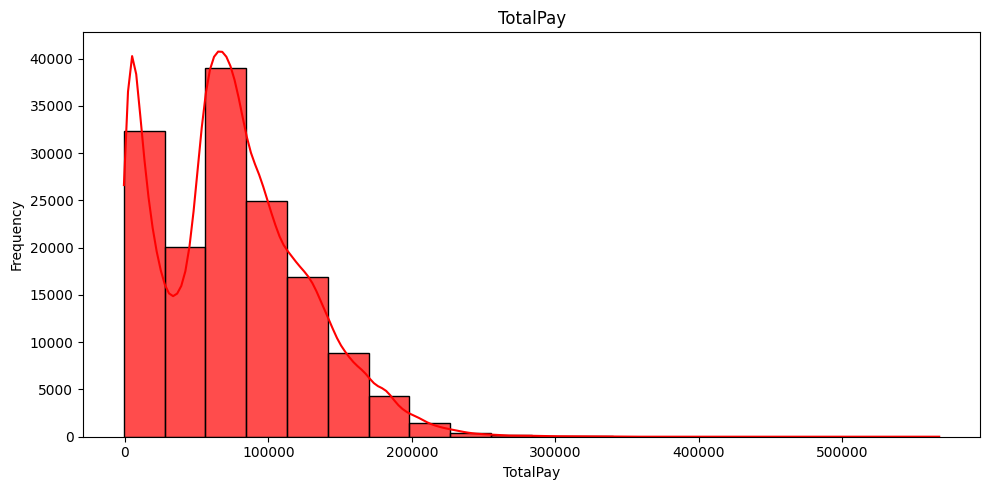

In [18]:
# Histogram for TotalPay
plt.figure(figsize=(10,5))
sns.histplot(df['TotalPay'], bins=20, kde=True, color='red', alpha=0.7)
plt.title('TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.tight_layout()

- The distribution analysis highlights a highly skewed pay structure, with most employees earning lower wages and a few receiving significantly higher

## Salary and Job Trends Analysis

### Salary Trends Over the Years
- The average `BasePay` per year was analyzed, showing a general trend over time.
- A line plot visualizes fluctuations in average salaries.
- Identifies any rising or declining salary trends over the years.

In [19]:
average_BasePay_per_year = df.groupby("Year")["BasePay"].mean().reset_index()

In [20]:
average_BasePay_per_year

,Year,BasePay
0,2011,63595.956517
1,2012,65436.406857
2,2013,69576.866579
3,2014,66564.396851


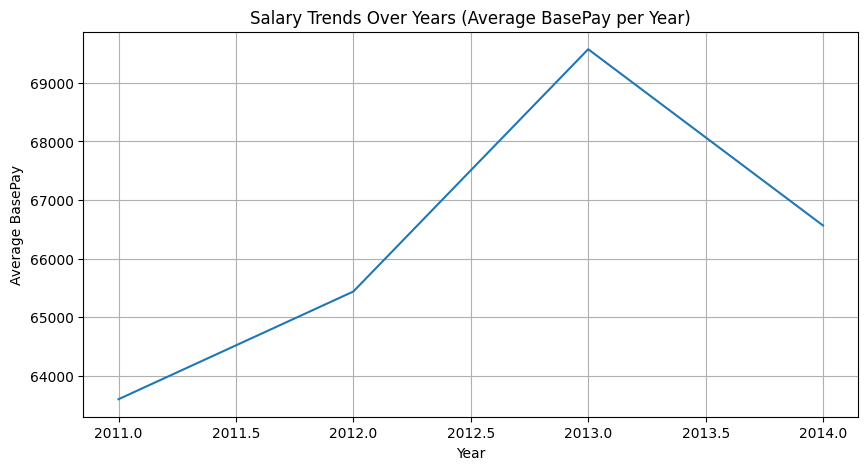

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(data=average_BasePay_per_year,x="Year",y="BasePay")
plt.title("Salary Trends Over Years (Average BasePay per Year)")
plt.xlabel("Year")
plt.ylabel("Average BasePay")
plt.grid(True)

### Total Salary Expenditure Trends
- Total `TotalPay` expenditure per year was calculated to analyze yearly spending.
- The plotted line chart shows the overall increase or decrease in total salary costs over time.

In [22]:
TotalPay_expenditure_per_year = df.groupby("Year")["TotalPay"].sum().reset_index()

In [23]:
TotalPay_expenditure_per_year

,Year,TotalPay
0,2011,2.594195e+09
1,2012,2.724848e+09
2,2013,2.958783e+09
3,2014,2.877176e+09


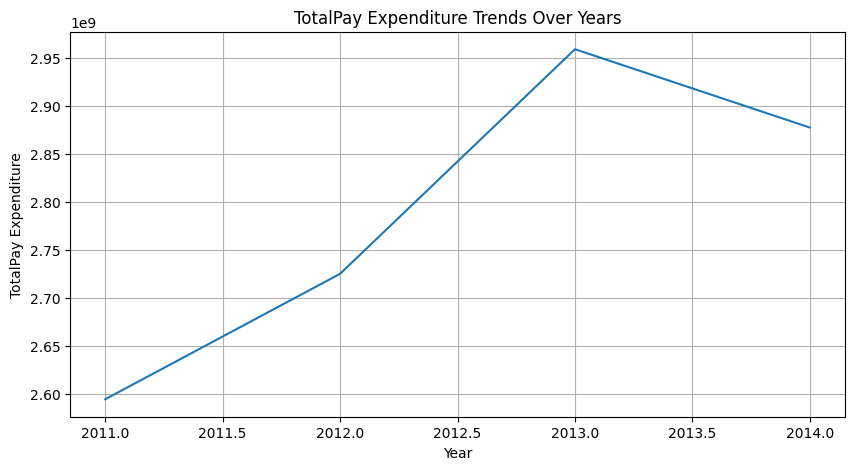

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(data=TotalPay_expenditure_per_year,x="Year",y="TotalPay")
plt.title("TotalPay Expenditure Trends Over Years")
plt.xlabel("Year")
plt.ylabel("TotalPay Expenditure")
plt.grid(True)

In [25]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


### Top-Paid Job Titles
- The top 10 highest-paid job titles were identified based on `TotalPay`.
- A bar chart visualizes the highest-earning roles.

In [26]:
avg_TotalPay_per_job = df.groupby("JobTitle")["TotalPay"].mean().reset_index()

In [27]:
top_10_paid_job = (avg_TotalPay_per_job.sort_values(by="TotalPay",ascending=False)).head(10)
top_10_paid_job

,JobTitle,TotalPay
831,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
466,Chief Investment Officer,339653.700000
474,Chief of Police,329183.646667
475,"Chief, Fire Department",325971.683333
586,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
324,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
838,"Gen Mgr, Public Trnsp Dept",297769.413333
206,Asst Chf of Dept (Fire Dept),281763.483889
576,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
621,"Dep Dir for Investments, Ret",278592.545000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'),
  Text(1, 0, 'Chief Investment Officer'),
  Text(2, 0, 'Chief of Police'),
  Text(3, 0, 'Chief, Fire Department'),
  Text(4, 0, 'DEPUTY DIRECTOR OF INVESTMENTS'),
  Text(5, 0, 'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)'),
  Text(6, 0, 'Gen Mgr, Public Trnsp Dept'),
  Text(7, 0, 'Asst Chf of Dept (Fire Dept)'),
  Text(8, 0, 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)'),
  Text(9, 0, 'Dep Dir for Investments, Ret')])

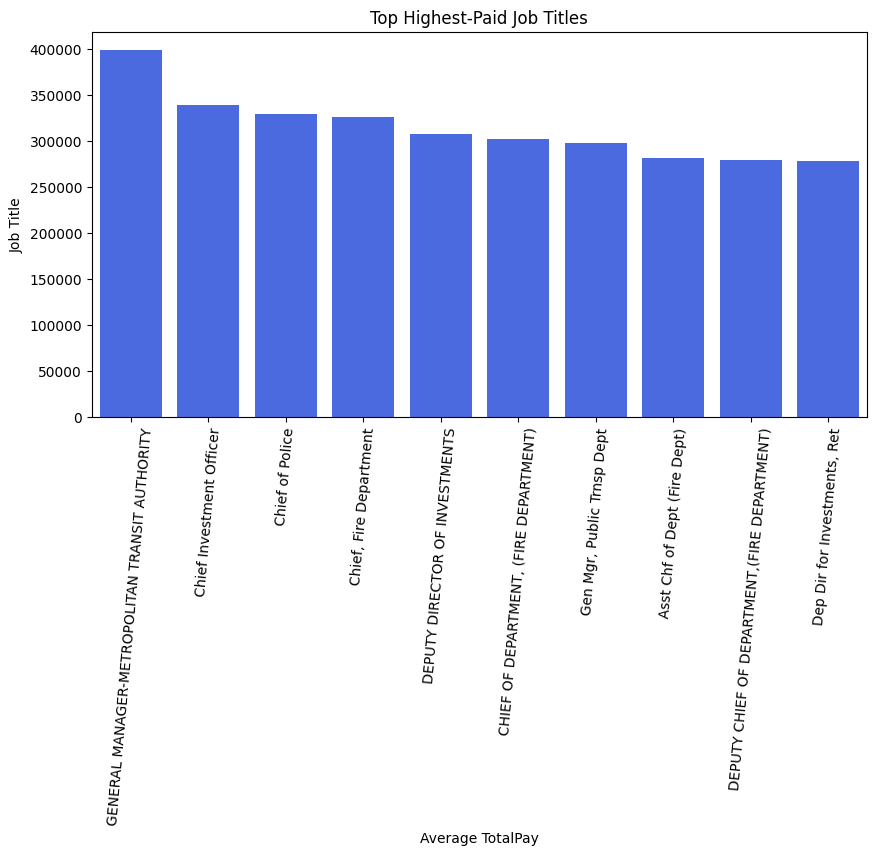

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_paid_job,x="JobTitle",y="TotalPay",color="#335BF9")
plt.title('Top Highest-Paid Job Titles')
plt.xlabel('Average TotalPay')
plt.ylabel('Job Title')
plt.xticks(rotation=85)

### Job Roles with Highest Overtime Pay
- The top 10 job roles with the highest average `OvertimePay` were identified.
- A bar chart illustrates which jobs earn the most overtime compensation.

In [29]:
avg_OvertimePay_job = df.groupby("JobTitle")["OvertimePay"].mean().reset_index()

In [30]:
top_10_overtime_paid_job = (avg_OvertimePay_job.sort_values(by="OvertimePay",ascending=False)).head(10)
top_10_overtime_paid_job

,JobTitle,OvertimePay
2151,Wire Rope Cable Maint Sprv,82446.923333
2126,WIRE ROPE CABLE MAINTENANCE SUPERVISOR,66164.730000
2071,Trnst Power Line Wrk Sprv 2,59259.306667
2033,Track Maint Wrk Sprv 1,50613.903478
987,Incident Support Specialist,50596.387143
267,"Battalion Chief, Fire Suppress",49453.051385
1228,Mech Shop & Equip Supt,47362.470000
2062,Transit Power Line Sprv1,46455.926842
206,Asst Chf of Dept (Fire Dept),46024.222222
894,Heating/Ventilating Inspector,45997.238333


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Wire Rope Cable Maint Sprv'),
  Text(1, 0, 'WIRE ROPE CABLE MAINTENANCE SUPERVISOR'),
  Text(2, 0, 'Trnst Power Line Wrk Sprv 2'),
  Text(3, 0, 'Track Maint Wrk Sprv 1'),
  Text(4, 0, 'Incident Support Specialist'),
  Text(5, 0, 'Battalion Chief, Fire Suppress'),
  Text(6, 0, 'Mech Shop & Equip Supt'),
  Text(7, 0, 'Transit Power Line Sprv1'),
  Text(8, 0, 'Asst Chf of Dept (Fire Dept)'),
  Text(9, 0, 'Heating/Ventilating Inspector')])

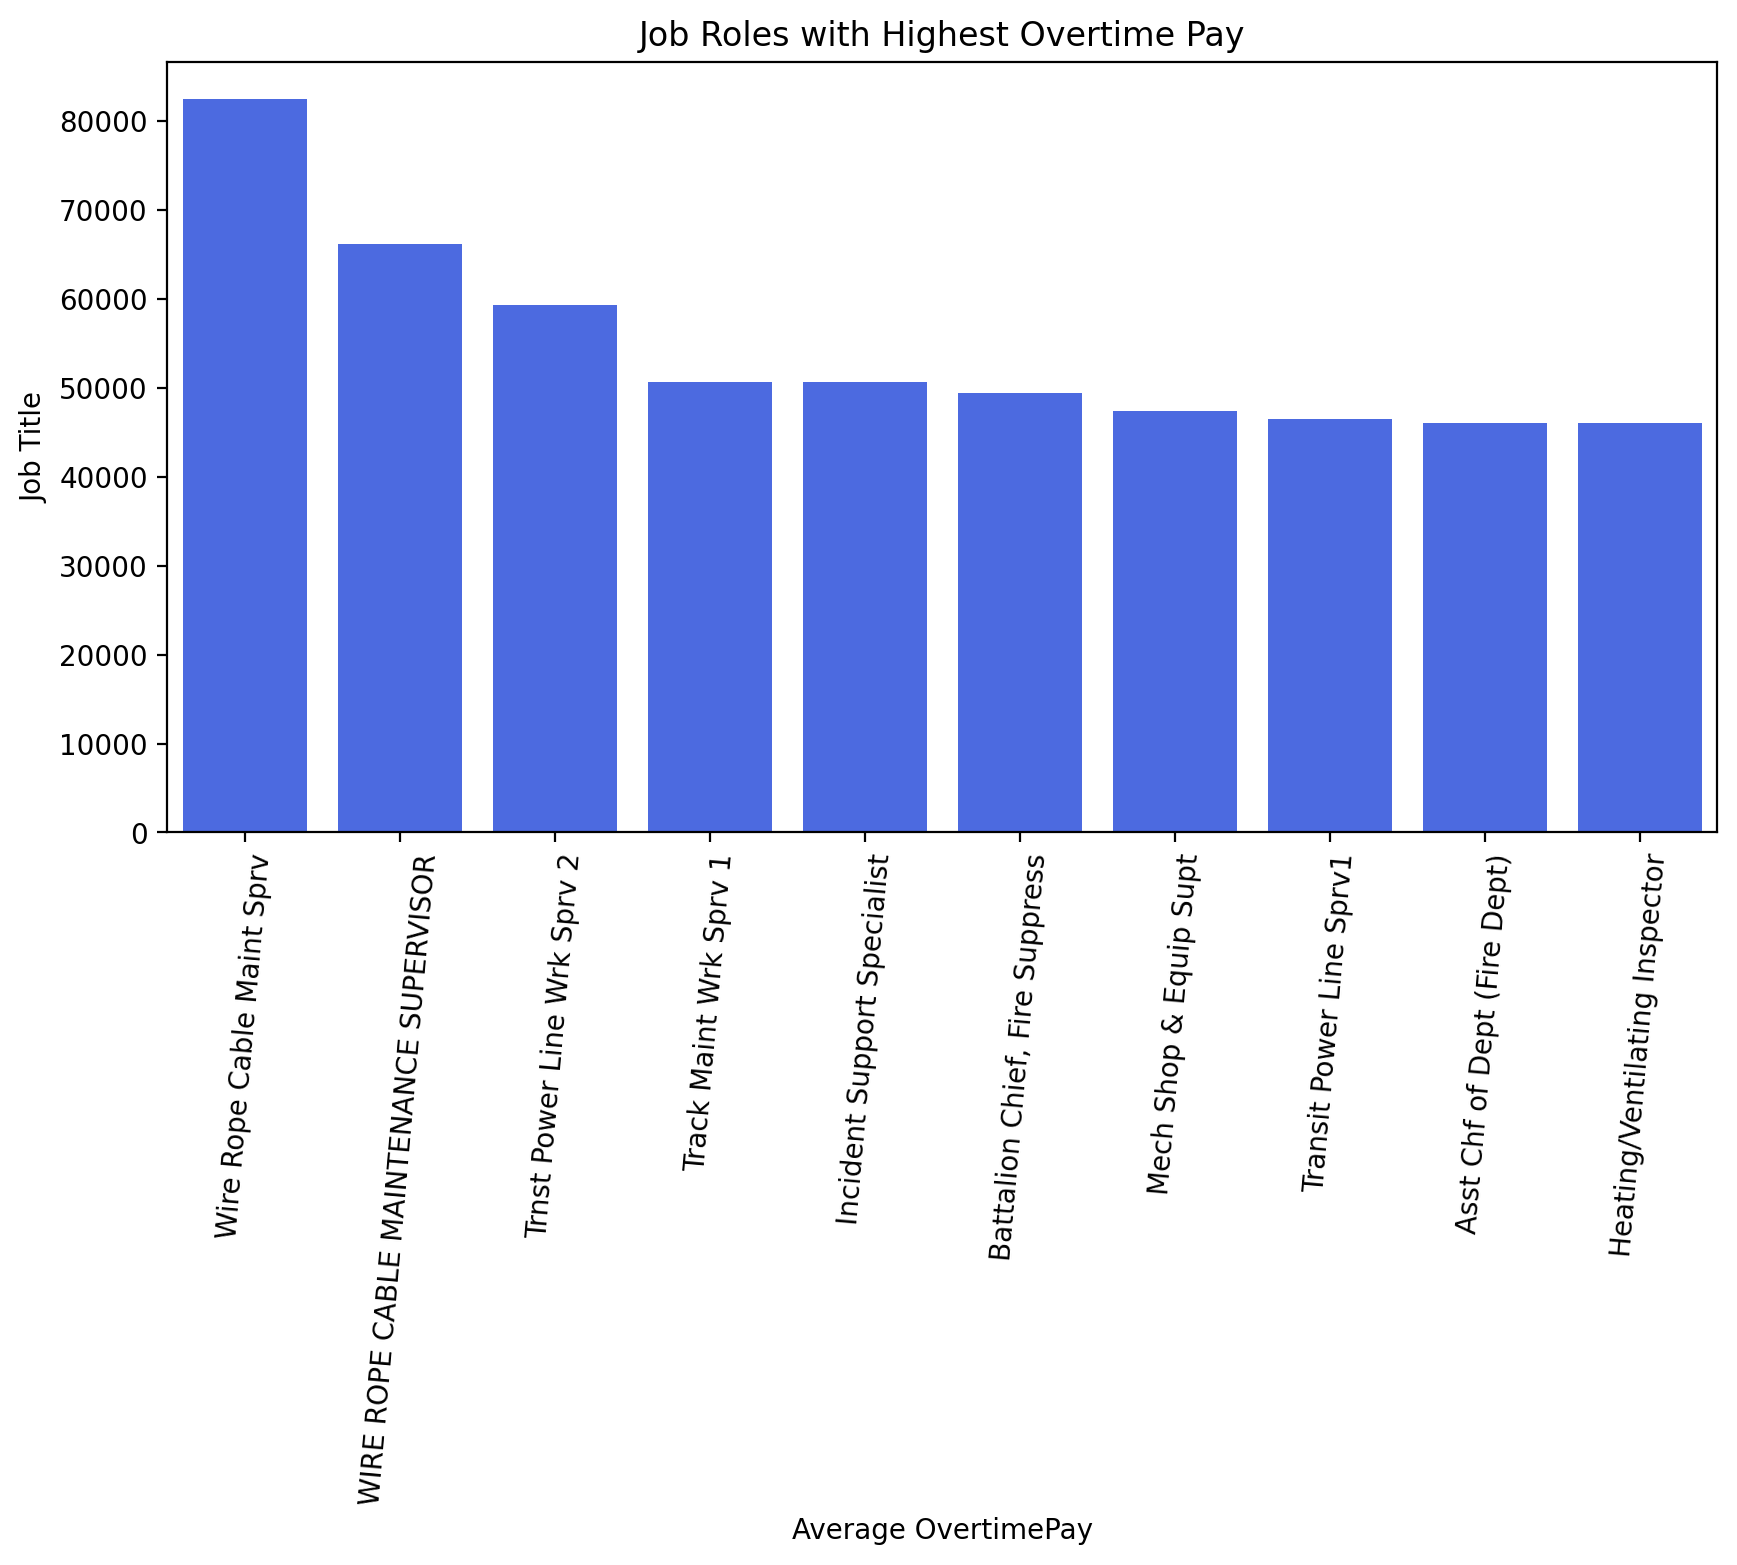

In [31]:
plt.figure(figsize=(10, 5),dpi=200)
sns.barplot(data=top_10_overtime_paid_job,x="JobTitle",y="OvertimePay",color="#335BF9")
plt.title('Job Roles with Highest Overtime Pay')
plt.xlabel('Average OvertimePay')
plt.ylabel('Job Title')
plt.xticks(rotation=85)

### Unique Job Titles Count
- The dataset contains a total of `2159` unique job titles.

In [32]:
# How many unique job titles exist?
df["JobTitle"].nunique()

2159

### Outliers in Total Compensation
- A boxplot was generated for `TotalPayBenefits` to identify unusually high salaries.
- Outliers are data points that deviate significantly from the overall distribution of salaries.
- The presence of high outliers suggests that a small group of employees earn substantially more than the majority.
- This could be due to executive salaries, bonuses, or specific job roles with higher compensation packages.
- The boxplot helps to visualize the spread of salaries and detect any extreme values that may warrant further investigation.

Text(0.5, 0, 'TotalPayBenefits')

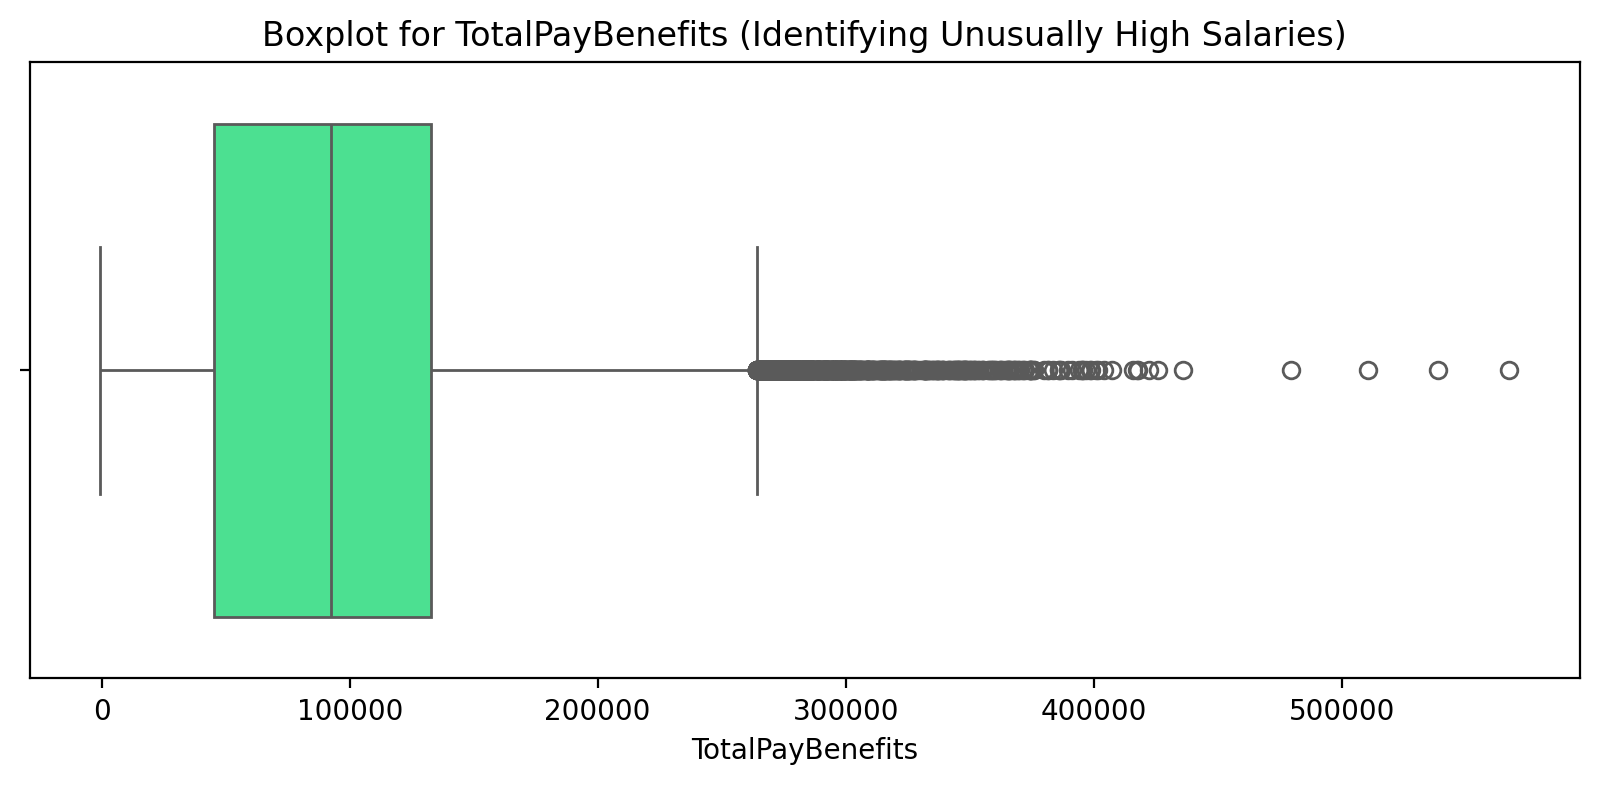

In [33]:
plt.figure(figsize=(10, 4),dpi=200)
sns.boxplot(data=df,x="TotalPayBenefits",color="#33F98F")
plt.title('Boxplot for TotalPayBenefits (Identifying Unusually High Salaries)')
plt.xlabel("TotalPayBenefits")

### Highest-Paid Employees
- The 10 highest-paid employees (based on `TotalPayBenefits`) were identified.
- Names, job titles, and total earnings were extracted.

In [34]:
# Who are the highest-paid employees?

In [35]:
top_10_highest_paid_employees = (df.sort_values(by="TotalPayBenefits",ascending=False)).head(10)
top_10_highest_paid_employees[["EmployeeName","JobTitle","TotalPayBenefits"]]

,EmployeeName,JobTitle,TotalPayBenefits
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),538909.28
110531,David Shinn,Deputy Chief 3,510732.68
110532,Amy P Hart,Asst Med Examiner,479652.21
110533,William J Coaker Jr.,Chief Investment Officer,436224.36
72925,Gregory P Suhr,Chief of Police,425815.28
72926,Joanne M Hayes-White,"Chief, Fire Department",422353.40
110534,Gregory P Suhr,Chief of Police,418019.22
110535,Joanne M Hayes-White,"Chief, Fire Department",417435.10
110536,Ellen G Moffatt,Asst Med Examiner,415767.94


### Correlation Analysis
- The correlation matrix for `BasePay`, `OvertimePay`, and `TotalPayBenefits` was computed.
- A heatmap visualizes relationships between salary components.
- Helps in understanding which pay components are most interrelated.

In [36]:
# Relationship between BasePay, OvertimePay, TotalPay, and Benefits.
correlation_matrix = df[['BasePay', 'OvertimePay', 'TotalPayBenefits']].corr()
correlation_matrix

,BasePay,OvertimePay,TotalPayBenefits
BasePay,1.000000,0.266633,0.946330
OvertimePay,0.266633,1.000000,0.467719
TotalPayBenefits,0.946330,0.467719,1.000000


Text(0.5, 1.0, 'Correlation Analysis: BasePay, OvertimePay, TotalPay, and Benefits')

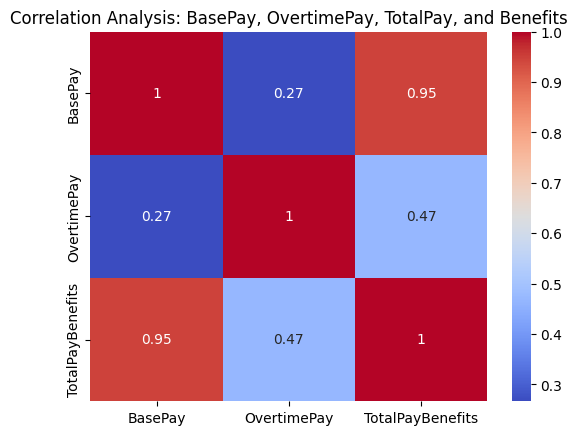

In [37]:
sns.heatmap(data=correlation_matrix,cmap='coolwarm',annot=True)
plt.title('Correlation Analysis: BasePay, OvertimePay, TotalPay, and Benefits')